In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba 
from wordcloud import WordCloud 
import matplotlib as mpl

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [3]:
data = pd.read_csv('E:\jupyter-notebook\data\ZhoPingData.csv',encoding = 'gbk') 
data.head()

,name,salary,area,edu,exp,company,type,welfare
0,招聘python开发工程师,10-24万,南京,统招本科,2年以上,公司南京中消安全技术有限公司,电子技术/半导体/集成电路,带薪年假
1,招聘python运维开发工程师,12-24万,南京,本科及以上,3年以上,公司孩子王,互联网/移动互联网/电子商务,五险一金
2,招聘python开发工程师,10-17万,南京,本科及以上,1年以上,公司南京赛宁信息技术有限公司,NaN,交通补助
3,招聘python开发工程师,10-17万,南京-江宁区,本科及以上,1年以上,公司南京赛宁信息技术有限公司,NaN,领导好
4,招聘python开发工程师,18-36万,南京,统招本科,2年以上,公司天数智芯,NaN,绩效奖金


In [4]:
#查看所有数据
leng = len(data)
print(leng)

3320


In [5]:
#地区数据清洗
area = data['area'].str.replace('-','|')
area=area.str.split('|')
city_list=[]
area_list=[]
for i in range(len(data)):
    try:
        if len(area[i])==2:
            city_list.append(area[i][0])
            area_list.append(area[i][1])
    except:
        print(area[i],"pass")

nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
nan pass
n

In [6]:
dicts = {'城市':city_list, '城区':area_list}
newdata = pd.DataFrame(dicts)
newdata.head()

,城区,城市
0,江宁区,南京
1,雨花台区,南京
2,宁南,南京
3,建邺区,南京
4,浦东新区,上海


In [7]:
from pyecharts import Map
# 查看各区岗位数量
area_job = newdata['城区'].groupby(newdata['城市']).value_counts()
area_city = list(area_job['南京'].index)
area_num = list(area_job['南京'].values)
map = Map('南京市各区岗位分布图', width=1200, height=600)
map.add('', area_city, area_num, visual_range=[0, 150], visual_text_color='#000', is_visualmap=True,
        is_label_show=True, maptype='南京')
#map.render('./job_city_area.html')
map

In [8]:
from pyecharts import Map
# 查看各区岗位数量
area_job = newdata['城区'].groupby(newdata['城市']).value_counts()
area_city = list(area_job['上海'].index)
area_num = list(area_job['上海'].values)
map = Map('上海市各区岗位分布图', width=1200, height=600)
map.add('', area_city, area_num, visual_range=[0, 150], visual_text_color='orange', is_visualmap=True,
        is_label_show=True, maptype='上海')
#map.render('./job_city_area.html')
map

In [9]:
# 查看薪资分类及分布
data['salary'].value_counts().head(30)

面议        683
12-18万    155
18-30万    133
12-24万    132
18-36万    122
24-48万     80
18-24万     77
24-36万     66
30-60万     63
10-18万     53
18-54万     31
20-39万     31
40-70万     31
26-52万     30
13-26万     30
36-60万     29
24-42万     26
10-19万     25
10-14万     24
14-24万     22
21-42万     21
28-56万     21
30-50万     21
10-12万     20
30-42万     20
14-28万     20
13-20万     19
7-10万      19
36-72万     19
20-26万     18
Name: salary, dtype: int64

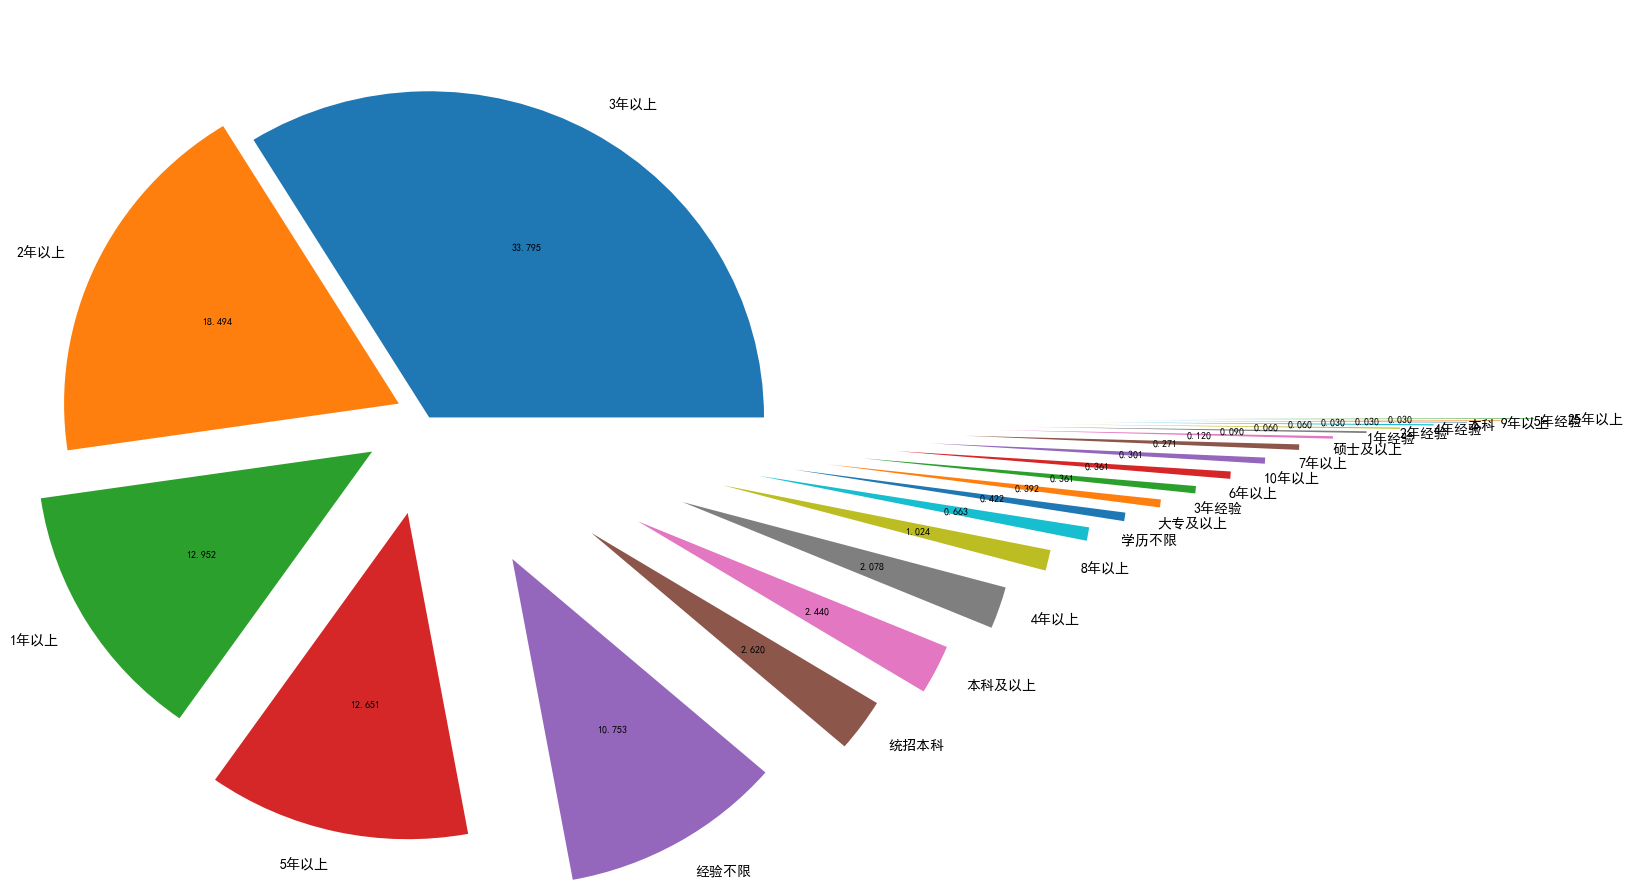

In [10]:
labels= list(data['exp'].value_counts().index)
fracs = list(data['exp'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3,1.4, 1.5,1.6, 1.7, 1.8, 1.9,2.0, 2.1, 2.2,2.3] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f')
plt.show()

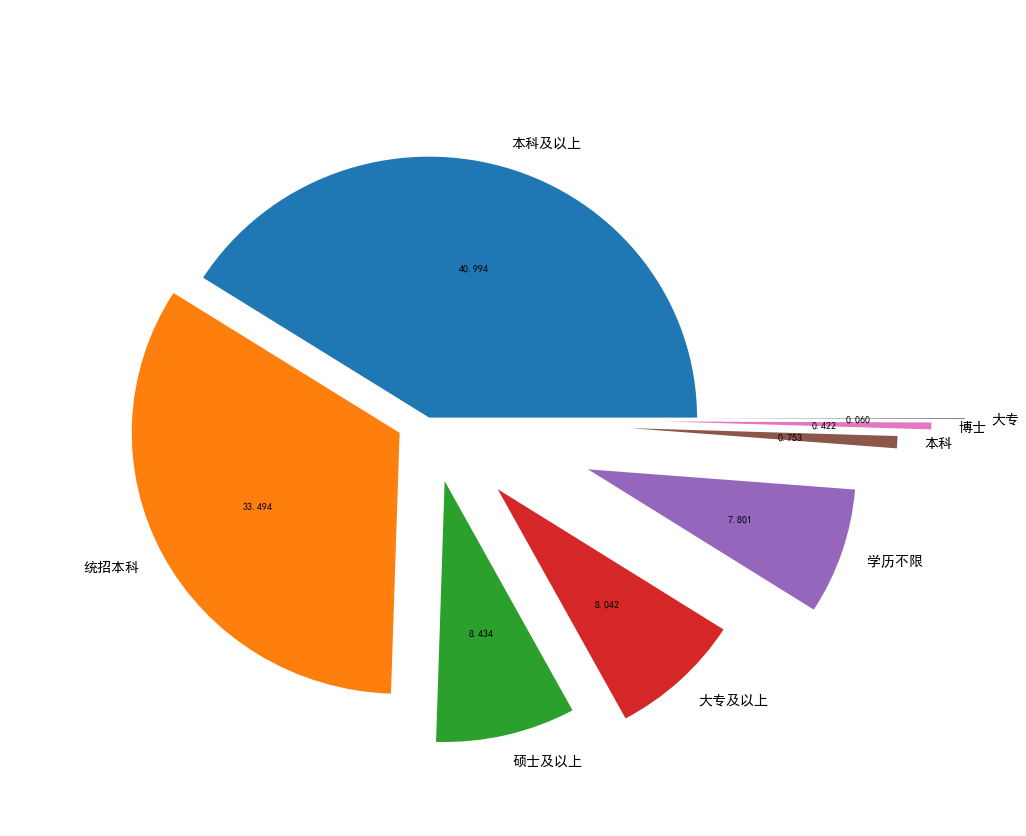

In [11]:
# 学历要求。基本上都是要求本科
labels= list(data['edu'].value_counts().index)
fracs = list(data['edu'].value_counts().values)
explode = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8] 
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%.3f',radius = 0.8)
plt.show()

In [13]:
# 查看前十工资数量
salary = data['salary'].value_counts()
salary = salary.head(20)
salary

面议        683
12-18万    155
18-30万    133
12-24万    132
18-36万    122
24-48万     80
18-24万     77
24-36万     66
30-60万     63
10-18万     53
18-54万     31
20-39万     31
40-70万     31
26-52万     30
13-26万     30
36-60万     29
24-42万     26
10-19万     25
10-14万     24
14-24万     22
Name: salary, dtype: int64

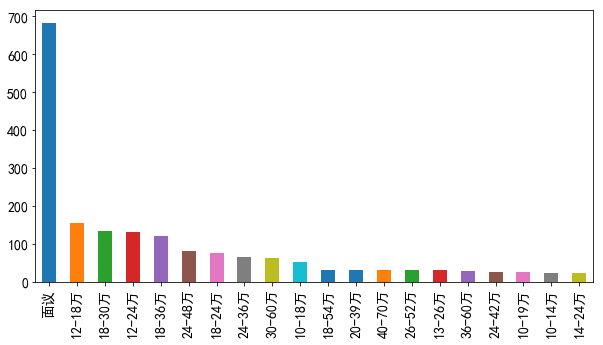

In [14]:
plt.figure(figsize=(10,5))
salary.plot.bar()
plt.show()

In [15]:
# 查看前十工资数量
type = data['type'].value_counts()
type = type.head(20)
type

互联网/移动互联网/电子商务        555
计算机软件                 297
电子技术/半导体/集成电路         168
IT服务/系统集成             100
基金/证券/期货/投资            95
通信(设备/运营/增值)           93
汽车/摩托车                 66
教育/培训/学术/科研/院校         41
网络游戏                   40
专业服务(咨询/财会/法律/翻译等)     39
仪器/仪表/工业自动化/电气         33
计算机硬件/网络设备             32
全部行业                   26
制药/生物工程                21
其他                     20
影视/媒体/艺术/文化/出版         19
机械制造/机电/重工             18
食品/饮料/烟酒/日化            18
医疗设备/器械                17
广告/公关/市场推广/会展          17
Name: type, dtype: int64

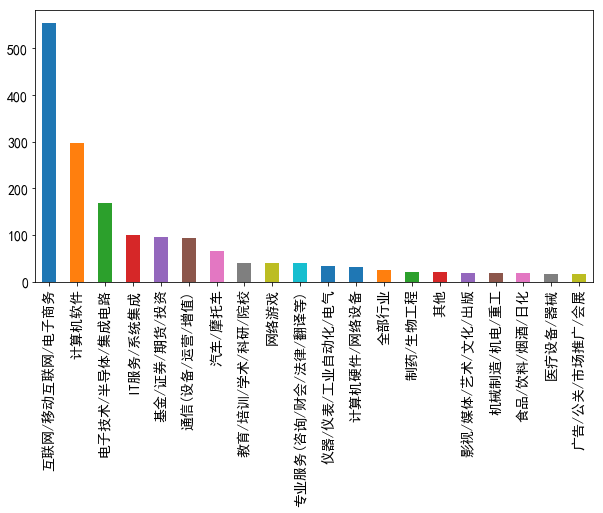

In [16]:
plt.figure(figsize=(10,5))
type.plot.bar()
plt.show()

In [17]:

companyShortName_Series = data['company'].value_counts()
companyShortName_Series_3 = companyShortName_Series[companyShortName_Series > 10] 
companyShortName_Series_3.head(10)

公司泛微                49
公司南京德胜智业信息技术有限公司    42
公司乐鑫科技              40
公司上海基分文化传播          32
公司腾讯                27
公司今日头条              23
公司天数智芯              23
公司触宝科技              22
公司国内知名互联网公司         22
公司游族                21
Name: company, dtype: int64

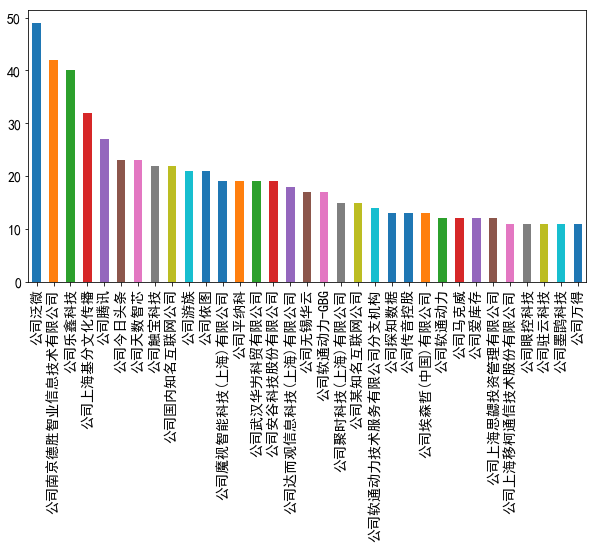

In [18]:
plt.figure(figsize=(10,5))
companyShortName_Series_3.plot.bar()
plt.show()

In [19]:
spider = data.loc[data['name'] == '招聘python爬虫工程师']
spider.head(6)

,name,salary,area,edu,exp,company,type,welfare
106,招聘python爬虫工程师,面议,NaN,本科及以上,本科及以上,公司今日头条,NaN,六险一金
129,招聘python爬虫工程师,面议,NaN,本科及以上,本科及以上,公司今日头条,NaN,六险一金
161,招聘python爬虫工程师,面议,NaN,统招本科,统招本科,公司北京泰洋明山文化传媒有限公司,影视/媒体/艺术/文化/出版,年底双薪
274,招聘python爬虫工程师,面议,深圳-龙华区,统招本科,3年以上,公司深圳市前海必胜道网络科技有限公司,NaN,带薪年假
345,招聘python爬虫工程师,10-12万,长沙,本科及以上,1年以上,公司福韵数据服务有限公司,专业服务(咨询/财会/法律/翻译等),五险一金
950,招聘python爬虫工程师,18-30万,成都-东光,本科及以上,2年以上,公司万科中西部区域产业城镇发展有限公司,NaN,带薪年假


In [20]:
high = data.loc[data['name'] == '招聘Python高级工程师']
high.head(10)

,name,salary,area,edu,exp,company,type,welfare
150,招聘Python高级工程师,18-36万,北京,本科及以上,3年以上,公司首都在线,互联网/移动互联网/电子商务,五险一金
238,招聘Python高级工程师,18-30万,北京-四季青,本科及以上,3年以上,公司北京中科物安科技有限公司,计算机硬件/网络设备,领导好
262,招聘Python高级工程师,12-24万,武汉-洪山区,本科及以上,3年以上,公司河南省现代农业大数据产业技术研究院有限公司,IT服务/系统集成,领导好
263,招聘Python高级工程师,12-24万,郑州-金水区,本科及以上,3年以上,公司河南省现代农业大数据产业技术研究院有限公司,IT服务/系统集成,领导好
272,招聘Python高级工程师,18-36万,成都-锦江区,统招本科,3年以上,公司成都新希望金融科技有限公司,互联网/移动互联网/电子商务,500强子公司
293,招聘Python高级工程师,30-50万,北京,统招本科,2年以上,公司某知名互联网公司,NaN,NaN
596,招聘Python高级工程师,22-58万,南京,学历不限,2年以上,公司南京德胜智业信息技术有限公司,NaN,股票期权
640,招聘Python高级工程师,22-58万,上海,学历不限,2年以上,公司南京德胜智业信息技术有限公司,NaN,股票期权
666,招聘Python高级工程师,22-58万,苏州,学历不限,2年以上,公司南京德胜智业信息技术有限公司,NaN,股票期权
686,招聘Python高级工程师,22-58万,苏州,学历不限,2年以上,公司南京德胜智业信息技术有限公司,NaN,股票期权


In [21]:
final = ''  
stopwords = ['招聘','python','Python','工程师','（','）','开发'] 
for n in range(len(data)):
    
    seg_list = list(jieba.cut(data['name'][n]))
   
    for seg in seg_list:  
        if seg not in stopwords:  
                final = final + seg + ' '

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\10406\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\10406\AppData\Local\Temp\jieba.cache
Loading model cost 1.831 seconds.
DEBUG:jieba:Loading model cost 1.831 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

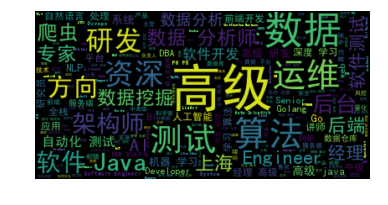

In [22]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font).generate(final)
final = " ".join(jieba.cut(final))

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [23]:
from wordcloud import WordCloud
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
wordcloud = WordCloud(font_path=font,                      
                      background_color='white', 
                      max_words=400,                    
                      max_font_size=50,            
                      width=200,
                      height = 150,
                      margin = 2,        
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


(-0.5, 199.5, 149.5, -0.5)

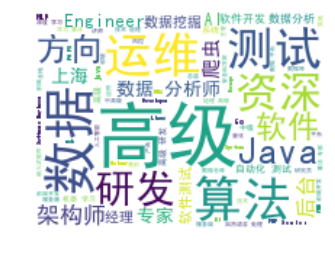

In [24]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [25]:
from wordcloud import WordCloud
from scipy.misc import imread
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'
color_mask = imread(r"E:\jupyter-notebook\data\001.jpg") 
wordcloud = WordCloud(font_path=font,                      
                      background_color='white',
                      max_words=400,
                      mask=color_mask,
                      max_font_size=50,
                      width=200,
                      height = 150,
                      margin = 2,
                      prefer_horizontal = 0.8
                     ).generate(final)
final = " ".join(jieba.cut(final))

Populating the interactive namespace from numpy and matplotlib


C:\Python\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 499.5, 322.5, -0.5)

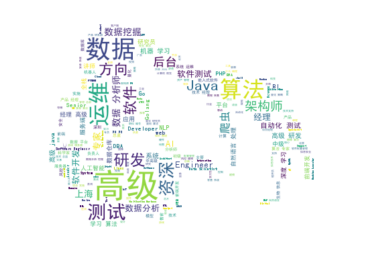

In [26]:
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [27]:
salary_model = data['salary'].str.replace('万','')
salary_model=salary_model.str.split('-')
salary1_list=[]
salary2_list=[]
jy_list=[]
city_li=[]
area_li=[]
type_li=[]
xueli_li=[]
for i in range(len(data)):
    try:
        if len(salary_model[i])==2:
            salary1_list.append(salary_model[i][0])
            salary2_list.append(salary_model[i][1])
            jy_list.append(data['exp'][i]) 
            city_li.append(data['area'][i])
            type_li.append(data['type'][i])
            xueli_li.append(data['edu'][i])
    except:
        print()

In [28]:
salary_dicts = {'最低工资/万':salary1_list, '最高工资/万':salary2_list, '经验':jy_list,'城区':city_li,'工作类型':type_li,'学历':xueli_li}
salary_data = pd.DataFrame(salary_dicts)
salary_data.head(10)

,城区,学历,工作类型,最低工资/万,最高工资/万,经验
0,南京,统招本科,电子技术/半导体/集成电路,10,24,2年以上
1,南京,本科及以上,互联网/移动互联网/电子商务,12,24,3年以上
2,南京,本科及以上,NaN,10,17,1年以上
3,南京-江宁区,本科及以上,NaN,10,17,1年以上
4,南京,统招本科,NaN,18,36,2年以上
5,南京-雨花台区,学历不限,NaN,12,18,经验不限
6,南京-宁南,本科及以上,NaN,18,36,经验不限
7,南京,本科及以上,计算机软件,10,21,2年以上
8,南京-建邺区,大专及以上,教育/培训/学术/科研/院校,10,12,2年以上
9,南京,大专及以上,计算机软件,10,18,1年以上


In [29]:
area_n = salary_data['城区'].str.split('-')
city1_list=[]
area1_list=[]
low_salary=[]
high_salary=[]
exp1_list=[]
type1_list=[]
edu_list=[]
for i in range(len(salary_data)):
    try:
        if len(area_n[i])==2:
            city1_list.append(area_n[i][0])
            area1_list.append(area_n[i][1])
            low_salary.append(salary_data['最低工资/万'][i])
            high_salary.append(salary_data['最高工资/万'][i])
            type1_list.append(salary_data['工作类型'][i])
            exp1_list.append(salary_data['经验'][i])
            edu_list.append(salary_data['学历'][i])
#             print(salary_data('学历')[i])
    except:
        print()

In [30]:
dict_2 = {'城市':city1_list,'城区':area1_list,'最低工资':low_salary,'最高工资':high_salary,'经验':exp1_list,'工作类型':type1_list,'学历':edu_list}
dict_2 = pd.DataFrame(dict_2)
dict_2.head()

,城区,城市,学历,工作类型,最低工资,最高工资,经验
0,江宁区,南京,本科及以上,NaN,10,17,1年以上
1,雨花台区,南京,学历不限,NaN,12,18,经验不限
2,宁南,南京,本科及以上,NaN,18,36,经验不限
3,建邺区,南京,大专及以上,教育/培训/学术/科研/院校,10,12,2年以上
4,浦东新区,上海,统招本科,NaN,16,26,2年以上


C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


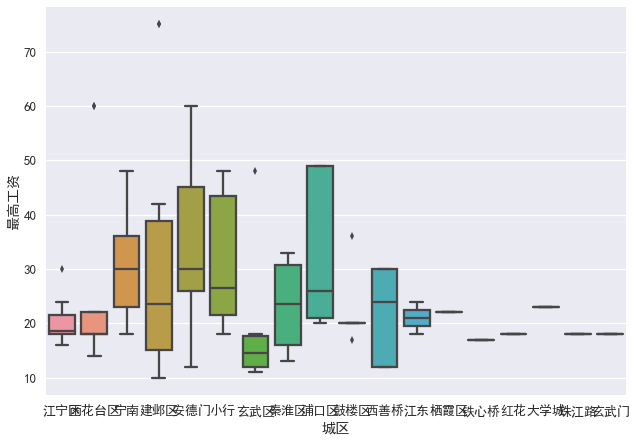

In [31]:
#coding:utf-8
import seaborn as sns
import matplotlib as mpl


sns.set_context("talk")


gz_data = dict_2[dict_2['城市']=='南京']
sns.boxplot(x=gz_data['城区'], y=gz_data['最高工资'].astype(np.int64))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

In [32]:
def plotlinebar(dataType_list, data_sala, data_num):
    dataType_sala = []
    for i in range(len(dataType_list)):
        numa = list(data_sala[dataType_list[i]].index)
        numb = list(data_sala[dataType_list[i]].values)
        result = sum(np.multiply(np.array(numa), np.array(numb)))/sum(numb)
        dataType_sala.append(result)
    dataType_sala = np.array(dataType_sala)
    
    angles = np.linspace(0, 2*np.pi, len(dataType_list), endpoint=False)
    data = np.concatenate((dataType_sala, [dataType_sala[0]]))
    angles = np.concatenate((angles, [angles[0]]))
                            
    ax = plt.figure(figsize=(10, 10)).add_subplot(111, polar=True)
    ax.plot(angles, data, 'bo-', linewidth=2)
    ax.fill(angles, data, facecolor='r', alpha=0.3)
    ax.set_thetagrids(angles*180/np.pi, dataType_list)    
    plt.show()

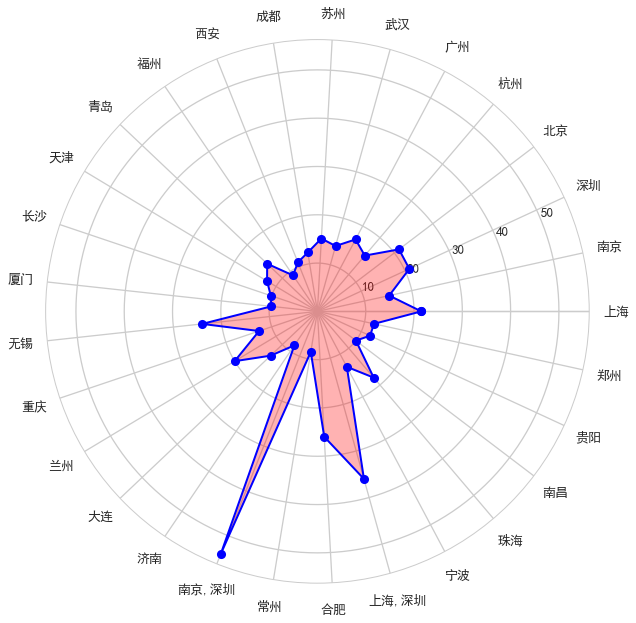

In [33]:
indcateType_list = list(dict_2['城市'].value_counts().index)
indcate_sala = dict_2['最低工资'].astype(np.int64).groupby(dict_2['城市']).value_counts()
indcate_num = list(dict_2['城市'].value_counts())
plotlinebar(indcateType_list, indcate_sala, indcate_num)

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


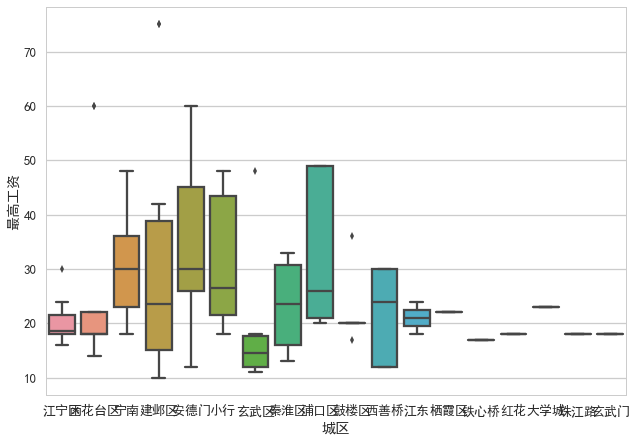

In [34]:
gz_data = dict_2[dict_2['城市']=='南京']
sns.boxplot(x=gz_data['城区'], y=gz_data['最高工资'].astype(np.int64))
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


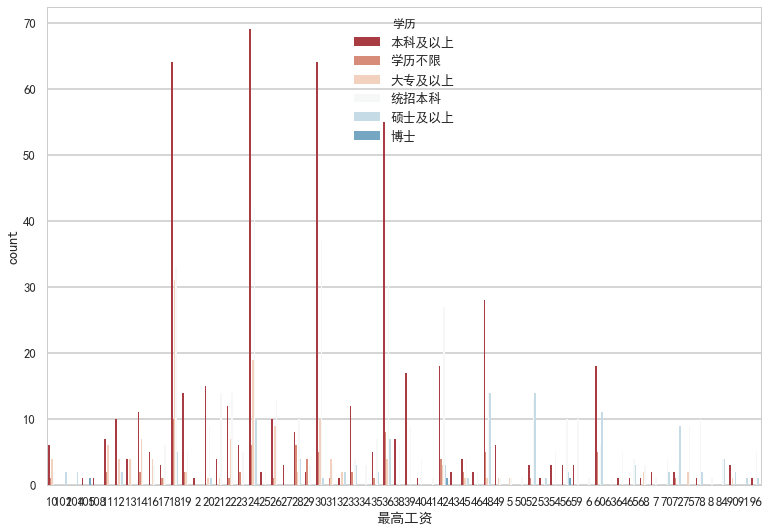

In [35]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
font = r'C:\Users\10406\Desktop\simheittf\simhei.ttf'

sns.set_style(style="whitegrid")

sns.set_context(context="poster",font_scale=0.8)


sns.set_palette(sns.color_palette("RdBu", n_colors=7))

sns.countplot(x="最高工资",hue="学历",data=dict_2)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.show()

C:\Python\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


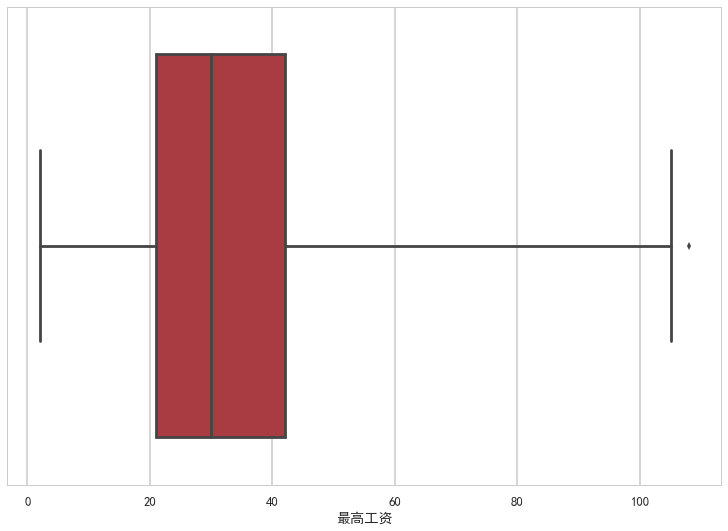

In [36]:
sns.boxplot(x =dict_2['最高工资'].astype(np.int64),saturation=0.75,whis=3)
plt.show()

0.220820189274


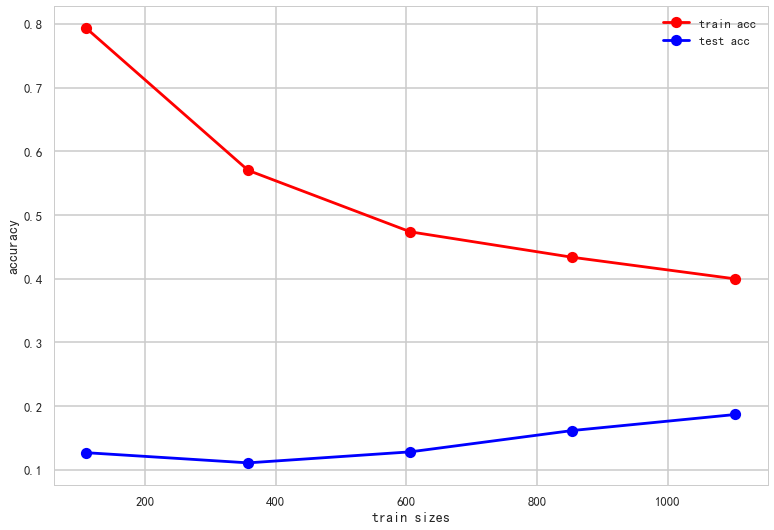

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import warnings
 
warnings.filterwarnings('ignore')
label_str = dict_2['最高工资']
train_data = dict_2.drop(columns=['工作类型', '最低工资', '最高工资'])
train_data = pd.get_dummies(train_data)
train_sizes, tr_loss, te_loss = learning_curve(LogisticRegression(), train_data, label_str,\
                                              cv=10, scoring='accuracy')
tr_loss_m = np.mean(tr_loss, axis=1)
te_loss_m = np.mean(te_loss, axis=1)
 
plt.figure()
plt.plot(train_sizes, tr_loss_m, 'o-', color='r', label='train acc')
plt.plot(train_sizes, te_loss_m, 'o-', color='b', label='test acc')
plt.xlabel('train sizes')
plt.ylabel('accuracy')
plt.legend(loc='best')
 
 
train_xs, test_xs, train_ys, test_ys = train_test_split(train_data, label_str, test_size=0.25)
 
model_lr = LogisticRegression()
scores = cross_val_score(model_lr, train_xs, train_ys, scoring='accuracy', cv=5)
model_lr.fit(train_xs, train_ys)
pred_lr = model_lr.predict(test_xs)
print(accuracy_score(test_ys, pred_lr))
plt.show()